In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# ========================= [0] MLflow Tracking =========================
mlflow.set_tracking_uri("file:../mlruns")

# Path to the registered run/model
logged_model = "runs:/870c9a74719f438fb4cc192815e066ba/RandomForestClassifier_SMOTE"

# Load model as a PyFuncModel
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [ ]:
# ========================= [1] Load Sample Data =========================
df = pd.read_csv("../Output/X_test_processed.csv")
sample_df = df.sample(n=50, random_state=42)

# Separate features & target
X_sample = sample_df.drop(columns=["HasCrCard"])
y_true   = sample_df["HasCrCard"]

# to prevent shape error during prediction
X_fixed = X_sample.copy()
X_fixed["HasCrCard"] = 0

Classification Report:

              precision    recall  f1-score   support

         0.0       0.35      0.72      0.47        18
         1.0       0.62      0.25      0.36        32

    accuracy                           0.42        50
   macro avg       0.48      0.49      0.41        50
weighted avg       0.52      0.42      0.40        50



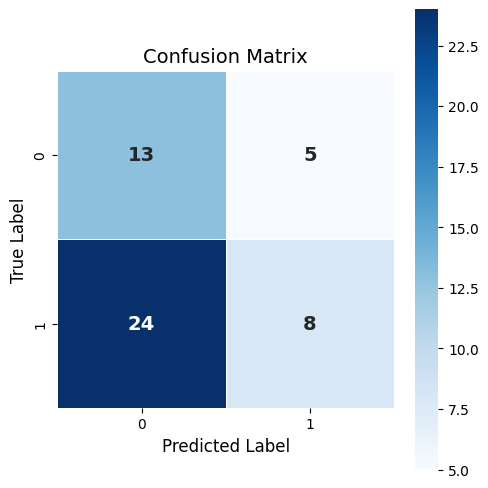

In [11]:
# ========================= [2] Predict =========================
y_pred = loaded_model.predict(X_fixed)

# ========================= [3] Evaluation =========================
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# ========================= [4] Confusion Matrix =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",linewidths=0.5, linecolor="white", cbar=True,square=True, annot_kws={"size": 14, "weight": "bold"}, ax=ax)

ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=14)
plt.tight_layout()
plt.show()

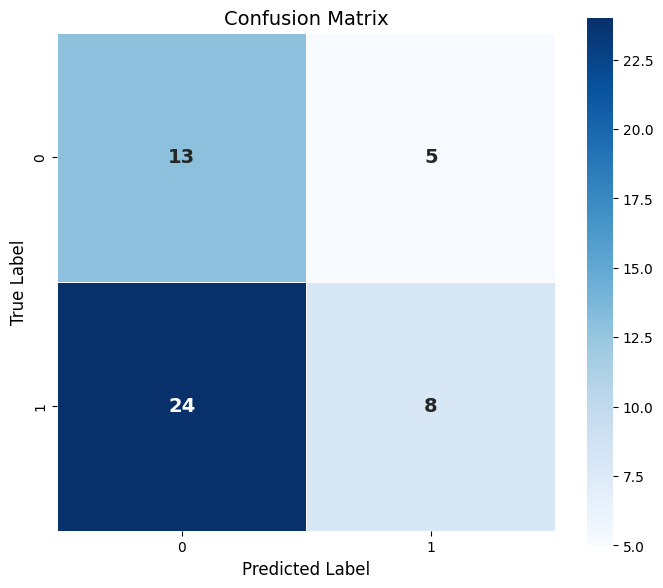